In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# warnings -> to silence warnings
import warnings
warnings.filterwarnings("ignore")

start = 9
n_antibiotici = 9
n_geni = 27
n_virulenza = 18
n = 46

In [118]:
#Train
df_train = pd.read_csv("../data/Training_1_"+str(n)+"picchi.csv",
                        delimiter=';', index_col='ID Strain')
#Test
df_test = pd.read_csv("../data/Testing_1_0%.csv",
                        delimiter=';', index_col='ID Strain')
#Prediction
df = df_test
#All

df

,Year,Region,Animal species of origin,Organ of origin,ST,Species,Putative Subspecies,LANCEFIELD GROUP,Haemolysis,"2225,446106",...,scpA,sda,ska,slo,smeZ,spec,speg,spek,spel,spem
ID Strain,,,,,,,,,,,,,,,,,,,,,
V1046,2021,NaN,Swine,Lung,ST580,Streptococcus_dysgalactiae,Streptococcus dysgalactiae subsp. equisimilis,A,b,0.000327,...,0,0,0,0,0,0,0,0,0,0
V1203,2022,NaN,Swine,Brain,ST338,Streptococcus_dysgalactiae,Streptococcus dysgalactiae subsp. equisimilis,C,b,0.000316,...,0,0,0,0,0,0,0,0,0,0
V1226,2022,NaN,Swine,Brain,ST685,Streptococcus_dysgalactiae,Streptococcus dysgalactiae subsp. equisimilis,C,b,0.000309,...,0,0,0,0,0,0,0,0,0,0
V1285,2022,NaN,Wild boar,Lung,ST259,Streptococcus_dysgalactiae,Streptococcus dysgalactiae subsp. equisimilis,C,b,0.000313,...,0,1,0,0,1,0,0,0,0,0
V1398,2022,NaN,Swine,Pus,ST684,Streptococcus_dysgalactiae,Streptococcus dysgalactiae subsp. equisimilis,C,b,0.000283,...,0,0,0,0,0,0,0,0,0,0
V1450,2022,NaN,Swine,Lung,ST397,Streptococcus_dysgalactiae,Streptococcus dysgalactiae subsp. equisimilis,C,b,0.000406,...,0,0,0,0,0,0,0,0,0,0
V1451,2022,NaN,Swine,Liver,ST686,Streptococcus_dysgalactiae,Streptococcus dysgalactiae subsp. equisimilis,C,b,0.000273,...,0,0,0,0,0,0,0,0,0,0
V1524,2022,NaN,Swine,Spleen,ST634,Streptococcus_dysgalactiae,Streptococcus dysgalactiae subsp. equisimilis,C,b,0.000400,...,0,1,0,0,0,0,1,0,0,0
V234,2019,Lazio,Bovine,NaN,ST338,Streptococcus_dysgalactiae,Streptococcus dysgalactiae subsp. equisimilis,C,b,0.000283,...,0,1,0,0,0,0,0,0,0,0


In [119]:
reduce_name = {
    "Streptococcus canis" : "Canis",
    "Streptococcus dysgalactiae subsp. equisimilis" : "Equisimilis",
    "Streptococcus dysgalactiae subsp. dysgalactiae" : "Dysgalactiae"  
}

reduce_name_species = {
    "Streptococcus_canis" : "Strept. Canis",
    "Streptococcus_dysgalactiae" : "Strept. Dysg."
}

target_to_name = {
    0 : "Canis",
    1 : "Equisimilis",
    2 : "Dysgalactiae"  
}

target_to_number = {
    "Canis" : 0,
    "Equisimilis" : 1,
    "Dysgalactiae" : 2  
}
df["Putative Subspecies"] = df["Putative Subspecies"].map(reduce_name)
df["Species"] = df["Species"].map(reduce_name_species)

In [120]:
# load dataset
metadati = df[['Year','Region','Animal species of origin','Organ of origin']]
principali = df[['ST','Species','Putative Subspecies','LANCEFIELD GROUP','Haemolysis']]
animal  = df[['Animal species of origin']]
maldi = df[df.columns[start:start+46]]
antibiotici = df[df.columns[start+n:start+n+n_antibiotici]]
geni_antibiotici = df[df.columns[start+n+n_antibiotici:start+n+n_antibiotici+n_geni]]
virulenza = df[df.columns[start+n+n_antibiotici+n_geni:start+n+n_antibiotici+n_geni+n_virulenza]]

print(f"Record:{df.shape[0]}")
print(f"Feature totali:{df.shape[1]}")
print(f"Feature metadati origine: {metadati.shape[1]}")
print(f"Feature informazioni principali: {principali.shape[1]}")
print(f"Feature picchi MALDI: {maldi.shape[1]}")
print(f"Feature sensibilità agli antibiotici: {antibiotici.shape[1]}")
print(f"Feature geni di antibiotico-resistenza: {geni_antibiotici.shape[1]}")
print(f"Feature fattori di virulenza: {virulenza.shape[1]}")

df.head(10)

Record:14
Feature totali:119
Feature metadati origine: 4
Feature informazioni principali: 5
Feature picchi MALDI: 46
Feature sensibilità agli antibiotici: 9
Feature geni di antibiotico-resistenza: 27
Feature fattori di virulenza: 18


,Year,Region,Animal species of origin,Organ of origin,ST,Species,Putative Subspecies,LANCEFIELD GROUP,Haemolysis,"2225,446106",...,scpA,sda,ska,slo,smeZ,spec,speg,spek,spel,spem
ID Strain,,,,,,,,,,,,,,,,,,,,,
V1046,2021,NaN,Swine,Lung,ST580,Strept. Dysg.,Equisimilis,A,b,0.000327,...,0,0,0,0,0,0,0,0,0,0
V1203,2022,NaN,Swine,Brain,ST338,Strept. Dysg.,Equisimilis,C,b,0.000316,...,0,0,0,0,0,0,0,0,0,0
V1226,2022,NaN,Swine,Brain,ST685,Strept. Dysg.,Equisimilis,C,b,0.000309,...,0,0,0,0,0,0,0,0,0,0
V1285,2022,NaN,Wild boar,Lung,ST259,Strept. Dysg.,Equisimilis,C,b,0.000313,...,0,1,0,0,1,0,0,0,0,0
V1398,2022,NaN,Swine,Pus,ST684,Strept. Dysg.,Equisimilis,C,b,0.000283,...,0,0,0,0,0,0,0,0,0,0
V1450,2022,NaN,Swine,Lung,ST397,Strept. Dysg.,Equisimilis,C,b,0.000406,...,0,0,0,0,0,0,0,0,0,0
V1451,2022,NaN,Swine,Liver,ST686,Strept. Dysg.,Equisimilis,C,b,0.000273,...,0,0,0,0,0,0,0,0,0,0
V1524,2022,NaN,Swine,Spleen,ST634,Strept. Dysg.,Equisimilis,C,b,0.000400,...,0,1,0,0,0,0,1,0,0,0
V234,2019,Lazio,Bovine,NaN,ST338,Strept. Dysg.,Equisimilis,C,b,0.000283,...,0,1,0,0,0,0,0,0,0,0


# Analysis metadati

**Data preparation**

In [121]:
#Dato che non si può convertire ante 2004 in intero lo sostituisco con 2003 anche se non considera solo il 2003 ma tutti gli anni prima
metadati = metadati.replace('ante 2004','2003')
metadati['Year']=pd.to_numeric(metadati['Year'])
metadati['target'] = principali["Putative Subspecies"]

In [122]:
metadati.sample(10)

,Year,Region,Animal species of origin,Organ of origin,target
ID Strain,,,,,
V1524,2022,NaN,Swine,Spleen,Equisimilis
V1046,2021,NaN,Swine,Lung,Equisimilis
V1398,2022,NaN,Swine,Pus,Equisimilis
V946,2021,NaN,Swine,Brain,Equisimilis
V257,2019,Umbria,Swine,Brain,Equisimilis
V1203,2022,NaN,Swine,Brain,Equisimilis
V1285,2022,NaN,Wild boar,Lung,Equisimilis
V1450,2022,NaN,Swine,Lung,Equisimilis
V234,2019,Lazio,Bovine,NaN,Equisimilis


In [123]:
print("Valori nulli per feature:")
metadati.isnull().sum()

Valori nulli per feature:


Year                         0
Region                      12
Animal species of origin     0
Organ of origin              3
target                       0
dtype: int64

In [124]:
print("Percentuale valori nulli per feature:")
metadati.isnull().sum() / metadati.shape[0] *100 

Percentuale valori nulli per feature:


Year                         0.000000
Region                      85.714286
Animal species of origin     0.000000
Organ of origin             21.428571
target                       0.000000
dtype: float64

Per rimuovere i valori nulli:
- Region: la percentuale di nulli è alta quindi preferisco non utilizzare la colonna per futuri modelli
- Organ of origin: la percentuale di nulli è bassa quindi li sostituisco con il valora più frequente, eviterò comunque di utilizzarla per previsioni

# Analisi Principali

In [125]:
principali.dtypes

ST                     object
Species                object
Putative Subspecies    object
LANCEFIELD GROUP       object
Haemolysis             object
dtype: object

In [126]:
principali

,ST,Species,Putative Subspecies,LANCEFIELD GROUP,Haemolysis
ID Strain,,,,,
V1046,ST580,Strept. Dysg.,Equisimilis,A,b
V1203,ST338,Strept. Dysg.,Equisimilis,C,b
V1226,ST685,Strept. Dysg.,Equisimilis,C,b
V1285,ST259,Strept. Dysg.,Equisimilis,C,b
V1398,ST684,Strept. Dysg.,Equisimilis,C,b
V1450,ST397,Strept. Dysg.,Equisimilis,C,b
V1451,ST686,Strept. Dysg.,Equisimilis,C,b
V1524,ST634,Strept. Dysg.,Equisimilis,C,b
V234,ST338,Strept. Dysg.,Equisimilis,C,b


In [127]:
principali.isnull().sum()

ST                     0
Species                0
Putative Subspecies    0
LANCEFIELD GROUP       0
Haemolysis             0
dtype: int64

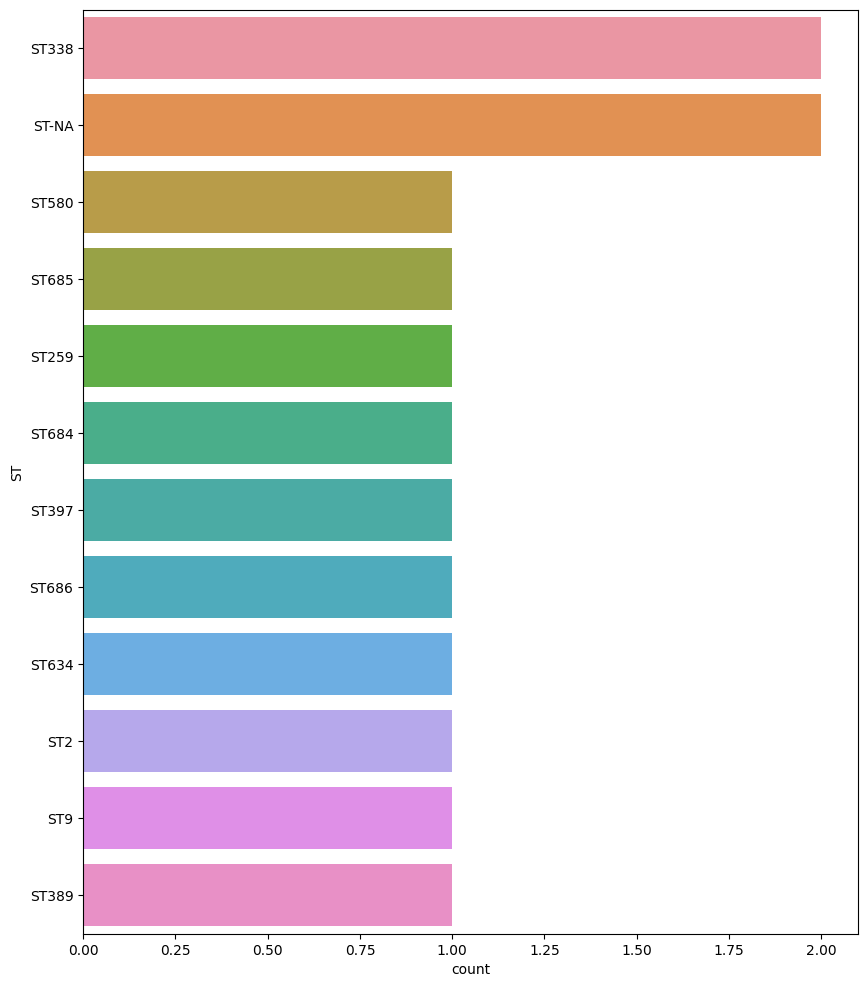

In [128]:
fig = plt.figure(figsize=(10, 12))
sns.countplot(y="ST", data=principali, order = principali['ST'].value_counts().index)
plt.show()

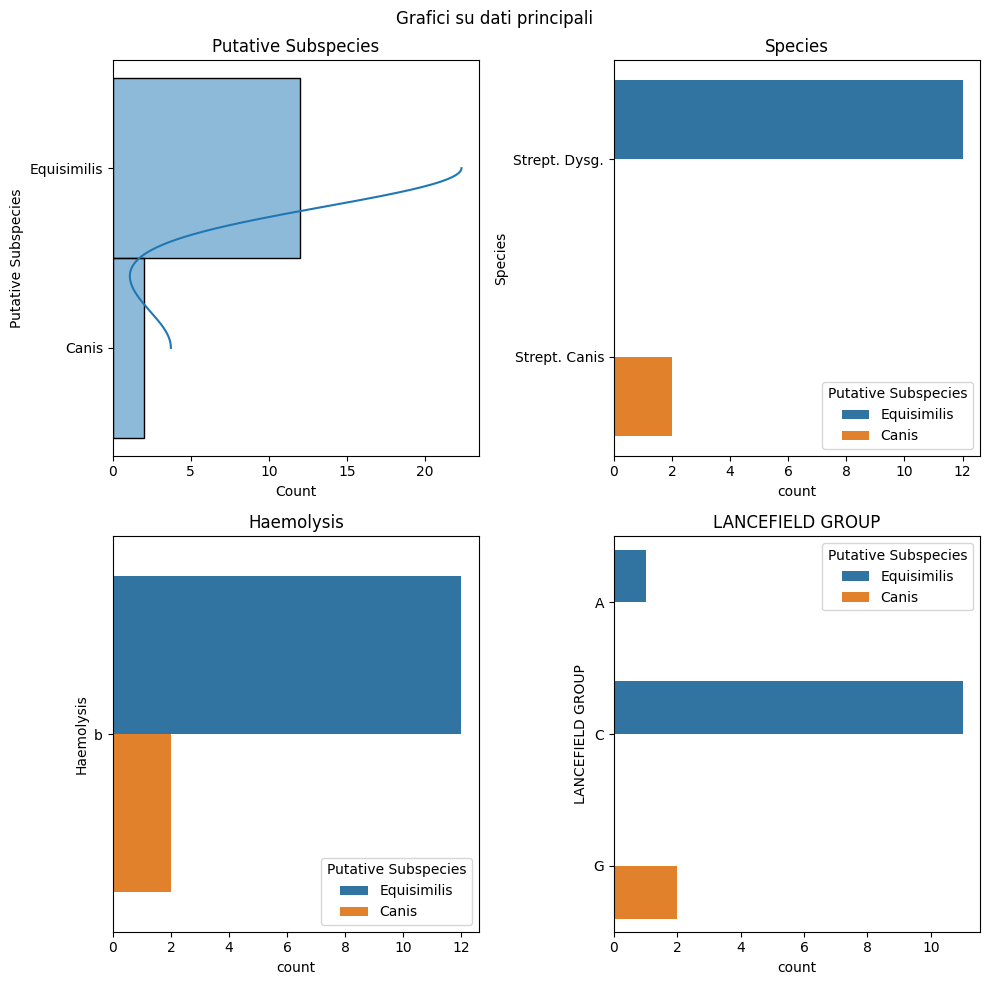

In [129]:
fig = plt.figure(figsize=(10, 10))
axes = fig.subplots(nrows=2, ncols=2)
labels = ['Putative Subspecies', 'Species', 'Haemolysis', 'LANCEFIELD GROUP']
for ax,label in zip(axes.flat, labels):
    ax.set_title(label)
    if label == 'Putative Subspecies':
        sns.histplot(data=principali, y=label, ax=ax, kde=True)
    else:
        sns.countplot(y=label, data=principali, hue="Putative Subspecies", ax=ax)

plt.suptitle("Grafici su dati principali")
plt.tight_layout()
plt.show()

# Analisi Picchi Maldi

In [130]:
maldi

,"2225,446106","2237,371524","2245,272151","2263,964901","2271,177324","2284,555455","2958,224222","2971,796638","2979,800302","2993,666074",...,"6715,169773","6737,980487","6757,972303","6787,642317","6813,544778","6839,051014","6862,6638","6884,857232","6913,116925","6945,85521"
ID Strain,,,,,,,,,,,,,,,,,,,,,
V1046,0.000327,0.000241,0.000199,0.000139,0.000012,0.000066,0.000092,0.000114,0.000397,0.000286,...,0.000181,0.000365,0.000420,0.001136,0.000922,0.000536,0.000126,0.000021,0.000368,0.000337
V1203,0.000316,0.000246,0.000208,0.000163,0.000032,0.000113,0.000092,0.000111,0.000388,0.000277,...,0.000144,0.000367,0.000383,0.000989,0.000805,0.000520,0.000623,0.000398,0.000441,0.000238
V1226,0.000309,0.000218,0.000203,0.000127,0.000023,0.000074,0.000087,0.000109,0.000383,0.000272,...,0.000223,0.000517,0.001082,0.000879,0.000365,0.000259,0.000697,0.000594,0.000284,0.000133
V1285,0.000313,0.000209,0.000206,0.000081,0.000077,0.000081,0.000064,0.000084,0.000362,0.000250,...,0.000130,0.000326,0.000314,0.000451,0.001337,0.001139,0.000585,0.000210,0.000077,0.000436
V1398,0.000283,0.000183,0.000184,0.000124,0.000071,0.000092,0.000072,0.000084,0.000361,0.000244,...,0.000152,0.000346,0.000345,0.000521,0.001179,0.001135,0.000554,0.000130,0.000120,0.000459
V1450,0.000406,0.000271,0.000261,0.000080,0.000038,0.000102,0.000377,0.000267,0.000224,0.000123,...,0.000094,0.000286,0.000254,0.000315,0.000966,0.000824,0.000664,0.000367,0.000073,0.000279
V1451,0.000273,0.000180,0.000188,0.000134,0.000017,0.000072,0.000346,0.000243,0.000207,0.000114,...,0.000170,0.000410,0.000433,0.001146,0.000920,0.000540,0.000151,0.000031,0.000351,0.000362
V1524,0.000400,0.000271,0.000261,0.000095,0.000149,0.000156,0.000083,0.000103,0.000430,0.000300,...,0.000100,0.000256,0.000271,0.000423,0.001361,0.001171,0.000761,0.000356,0.000049,0.000376
V234,0.000283,0.000217,0.000172,0.000143,0.000026,0.000092,0.000082,0.000101,0.000352,0.000243,...,0.000123,0.000243,0.000345,0.001152,0.000918,0.000525,0.000506,0.000292,0.000393,0.000223


In [131]:
maldi.isnull().sum().sort_values(ascending=False).head(20)

2225,446106    0
6329,742774    0
4554,581291    0
4746,954616    0
4764,597262    0
5366,146355    0
5917,816809    0
5936,187789    0
5959,8031      0
5979,450927    0
5992,216014    0
6350,521185    0
2237,371524    0
6715,169773    0
6737,980487    0
6757,972303    0
6787,642317    0
6813,544778    0
6839,051014    0
6862,6638      0
dtype: int64

In [132]:
#sostituisco tutti i NaN con 0
maldi.fillna(0,inplace=True)

##### Preparazione dati maldi

In [133]:
maldi = maldi.replace(',', '.', regex=True)
maldi

,"2225,446106","2237,371524","2245,272151","2263,964901","2271,177324","2284,555455","2958,224222","2971,796638","2979,800302","2993,666074",...,"6715,169773","6737,980487","6757,972303","6787,642317","6813,544778","6839,051014","6862,6638","6884,857232","6913,116925","6945,85521"
ID Strain,,,,,,,,,,,,,,,,,,,,,
V1046,0.000327,0.000241,0.000199,0.000139,0.000012,0.000066,0.000092,0.000114,0.000397,0.000286,...,0.000181,0.000365,0.000420,0.001136,0.000922,0.000536,0.000126,0.000021,0.000368,0.000337
V1203,0.000316,0.000246,0.000208,0.000163,0.000032,0.000113,0.000092,0.000111,0.000388,0.000277,...,0.000144,0.000367,0.000383,0.000989,0.000805,0.000520,0.000623,0.000398,0.000441,0.000238
V1226,0.000309,0.000218,0.000203,0.000127,0.000023,0.000074,0.000087,0.000109,0.000383,0.000272,...,0.000223,0.000517,0.001082,0.000879,0.000365,0.000259,0.000697,0.000594,0.000284,0.000133
V1285,0.000313,0.000209,0.000206,0.000081,0.000077,0.000081,0.000064,0.000084,0.000362,0.000250,...,0.000130,0.000326,0.000314,0.000451,0.001337,0.001139,0.000585,0.000210,0.000077,0.000436
V1398,0.000283,0.000183,0.000184,0.000124,0.000071,0.000092,0.000072,0.000084,0.000361,0.000244,...,0.000152,0.000346,0.000345,0.000521,0.001179,0.001135,0.000554,0.000130,0.000120,0.000459
V1450,0.000406,0.000271,0.000261,0.000080,0.000038,0.000102,0.000377,0.000267,0.000224,0.000123,...,0.000094,0.000286,0.000254,0.000315,0.000966,0.000824,0.000664,0.000367,0.000073,0.000279
V1451,0.000273,0.000180,0.000188,0.000134,0.000017,0.000072,0.000346,0.000243,0.000207,0.000114,...,0.000170,0.000410,0.000433,0.001146,0.000920,0.000540,0.000151,0.000031,0.000351,0.000362
V1524,0.000400,0.000271,0.000261,0.000095,0.000149,0.000156,0.000083,0.000103,0.000430,0.000300,...,0.000100,0.000256,0.000271,0.000423,0.001361,0.001171,0.000761,0.000356,0.000049,0.000376
V234,0.000283,0.000217,0.000172,0.000143,0.000026,0.000092,0.000082,0.000101,0.000352,0.000243,...,0.000123,0.000243,0.000345,0.001152,0.000918,0.000525,0.000506,0.000292,0.000393,0.000223


In [134]:
columns = maldi.columns
for column in columns:
    maldi[column] = maldi[column].astype(float)
maldi

,"2225,446106","2237,371524","2245,272151","2263,964901","2271,177324","2284,555455","2958,224222","2971,796638","2979,800302","2993,666074",...,"6715,169773","6737,980487","6757,972303","6787,642317","6813,544778","6839,051014","6862,6638","6884,857232","6913,116925","6945,85521"
ID Strain,,,,,,,,,,,,,,,,,,,,,
V1046,0.000327,0.000241,0.000199,0.000139,0.000012,0.000066,0.000092,0.000114,0.000397,0.000286,...,0.000181,0.000365,0.000420,0.001136,0.000922,0.000536,0.000126,0.000021,0.000368,0.000337
V1203,0.000316,0.000246,0.000208,0.000163,0.000032,0.000113,0.000092,0.000111,0.000388,0.000277,...,0.000144,0.000367,0.000383,0.000989,0.000805,0.000520,0.000623,0.000398,0.000441,0.000238
V1226,0.000309,0.000218,0.000203,0.000127,0.000023,0.000074,0.000087,0.000109,0.000383,0.000272,...,0.000223,0.000517,0.001082,0.000879,0.000365,0.000259,0.000697,0.000594,0.000284,0.000133
V1285,0.000313,0.000209,0.000206,0.000081,0.000077,0.000081,0.000064,0.000084,0.000362,0.000250,...,0.000130,0.000326,0.000314,0.000451,0.001337,0.001139,0.000585,0.000210,0.000077,0.000436
V1398,0.000283,0.000183,0.000184,0.000124,0.000071,0.000092,0.000072,0.000084,0.000361,0.000244,...,0.000152,0.000346,0.000345,0.000521,0.001179,0.001135,0.000554,0.000130,0.000120,0.000459
V1450,0.000406,0.000271,0.000261,0.000080,0.000038,0.000102,0.000377,0.000267,0.000224,0.000123,...,0.000094,0.000286,0.000254,0.000315,0.000966,0.000824,0.000664,0.000367,0.000073,0.000279
V1451,0.000273,0.000180,0.000188,0.000134,0.000017,0.000072,0.000346,0.000243,0.000207,0.000114,...,0.000170,0.000410,0.000433,0.001146,0.000920,0.000540,0.000151,0.000031,0.000351,0.000362
V1524,0.000400,0.000271,0.000261,0.000095,0.000149,0.000156,0.000083,0.000103,0.000430,0.000300,...,0.000100,0.000256,0.000271,0.000423,0.001361,0.001171,0.000761,0.000356,0.000049,0.000376
V234,0.000283,0.000217,0.000172,0.000143,0.000026,0.000092,0.000082,0.000101,0.000352,0.000243,...,0.000123,0.000243,0.000345,0.001152,0.000918,0.000525,0.000506,0.000292,0.000393,0.000223


In [135]:
maldi['target'] = principali["Putative Subspecies"].map(target_to_number)
#sns.pairplot(data=maldi, hue='target')
maldi[['target']].sample(10)

,target
ID Strain,
V1226,1
V1203,1
V1398,1
V1450,1
V257,1
V1524,1
V912,0
V971,1
V1046,1


In [136]:
#pd.DataFrame(maldi.describe().transpose)
maldi.describe()

,"2225,446106","2237,371524","2245,272151","2263,964901","2271,177324","2284,555455","2958,224222","2971,796638","2979,800302","2993,666074",...,"6737,980487","6757,972303","6787,642317","6813,544778","6839,051014","6862,6638","6884,857232","6913,116925","6945,85521",target
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.000335,0.000248,0.000220,0.000113,0.000044,0.000084,0.000139,0.000130,0.000353,0.000239,...,0.000450,0.000438,0.000605,0.000897,0.000723,0.000462,0.000224,0.000172,0.000307,0.857143
std,0.000073,0.000068,0.000055,0.000034,0.000043,0.000031,0.000117,0.000067,0.000099,0.000082,...,0.000242,0.000219,0.000374,0.000395,0.000351,0.000228,0.000162,0.000156,0.000111,0.363137
min,0.000273,0.000180,0.000172,0.000070,0.000001,0.000035,0.000057,0.000063,0.000193,0.000106,...,0.000243,0.000254,0.000164,0.000328,0.000259,0.000126,0.000021,0.000038,0.000133,0.000000
25%,0.000293,0.000207,0.000193,0.000081,0.000013,0.000067,0.000068,0.000084,0.000338,0.000226,...,0.000296,0.000311,0.000334,0.000540,0.000477,0.000221,0.000098,0.000053,0.000225,1.000000
50%,0.000312,0.000229,0.000204,0.000112,0.000029,0.000083,0.000085,0.000106,0.000361,0.000248,...,0.000355,0.000364,0.000469,0.000921,0.000538,0.000530,0.000203,0.000075,0.000308,1.000000
75%,0.000332,0.000271,0.000215,0.000138,0.000064,0.000099,0.000128,0.000142,0.000386,0.000276,...,0.000490,0.000451,0.000962,0.001159,0.001086,0.000654,0.000340,0.000335,0.000390,1.000000
max,0.000547,0.000445,0.000388,0.000167,0.000149,0.000156,0.000377,0.000267,0.000585,0.000416,...,0.001020,0.001082,0.001152,0.001533,0.001307,0.000761,0.000594,0.000441,0.000462,1.000000


#### Ricerca correllazioni più alte con variabile target 

In [137]:
corr = maldi.corr()
corr

,"2225,446106","2237,371524","2245,272151","2263,964901","2271,177324","2284,555455","2958,224222","2971,796638","2979,800302","2993,666074",...,"6737,980487","6757,972303","6787,642317","6813,544778","6839,051014","6862,6638","6884,857232","6913,116925","6945,85521",target
"2225,446106",1.000000,0.887779,0.986885,0.217969,-0.035111,0.290632,0.068272,0.159007,0.625288,0.569789,...,0.281788,-0.087040,-0.477355,-0.197927,-0.099122,-0.065840,-0.007464,-0.369534,-0.237710,-0.611935
"2237,371524",0.887779,1.000000,0.900171,0.294086,-0.306620,-0.035378,-0.113369,-0.033818,0.703152,0.660054,...,0.607902,0.092079,-0.520606,-0.521946,-0.391547,-0.330335,-0.126186,-0.333646,-0.512423,-0.735025
"2245,272151",0.986885,0.900171,1.000000,0.246283,-0.078933,0.235485,0.092374,0.180583,0.621967,0.562233,...,0.345168,-0.045047,-0.503467,-0.251370,-0.138570,-0.120064,-0.048726,-0.384167,-0.255299,-0.637017
"2263,964901",0.217969,0.294086,0.246283,1.000000,-0.458653,0.108695,-0.162157,-0.048631,0.519671,0.529801,...,0.078004,0.192561,0.543382,-0.388509,-0.579170,-0.316447,-0.036580,0.698019,-0.420648,-0.151257
"2271,177324",-0.035111,-0.306620,-0.078933,-0.458653,1.000000,0.731224,-0.193204,-0.220352,-0.013249,-0.024258,...,-0.580515,-0.459259,-0.176426,0.813836,0.870195,0.699394,0.233240,-0.369010,0.665412,0.392435
"2284,555455",0.290632,-0.035378,0.235485,0.108695,0.731224,1.000000,-0.010892,0.047827,0.186274,0.167567,...,-0.664957,-0.468541,0.116918,0.607173,0.524208,0.690877,0.426550,0.056571,0.325212,0.314721
"2958,224222",0.068272,-0.113369,0.092374,-0.162157,-0.193204,-0.010892,1.000000,0.987492,-0.674957,-0.718495,...,-0.228184,-0.258292,0.021246,0.077578,-0.000622,-0.103495,-0.109953,-0.001573,0.108423,0.148476
"2971,796638",0.159007,-0.033818,0.180583,-0.048631,-0.220352,0.047827,0.987492,1.000000,-0.575675,-0.620857,...,-0.247594,-0.245758,0.062394,0.043722,-0.059168,-0.109432,-0.080965,0.057193,0.045087,0.145350
"2979,800302",0.625288,0.703152,0.621967,0.519671,-0.013249,0.186274,-0.674957,-0.575675,1.000000,0.995870,...,0.357673,0.199246,-0.175599,-0.285320,-0.218424,-0.095717,0.015341,-0.063016,-0.315666,-0.501369
"2993,666074",0.569789,0.660054,0.562233,0.529801,-0.024258,0.167567,-0.718495,-0.620857,0.995870,1.000000,...,0.352896,0.231622,-0.125321,-0.292908,-0.237099,-0.088633,0.039665,-0.011432,-0.326114,-0.479835


In [138]:
corr = corr.sort_values('target')
top_corr_inv = corr[0:5]
top_corr = corr[-6:-1]
top_corr[['target']],top_corr_inv[['target']]

(               target
 6813,544778  0.520447
 3496,959488  0.559043
 3421,182855  0.607803
 3430,865856  0.628585
 3408,531259  0.639143,
                target
 6715,169773 -0.800102
 6737,980487 -0.788088
 3357,263519 -0.785568
 4554,581291 -0.766826
 2237,371524 -0.735025)

#### Pairplot 10 best correlation score

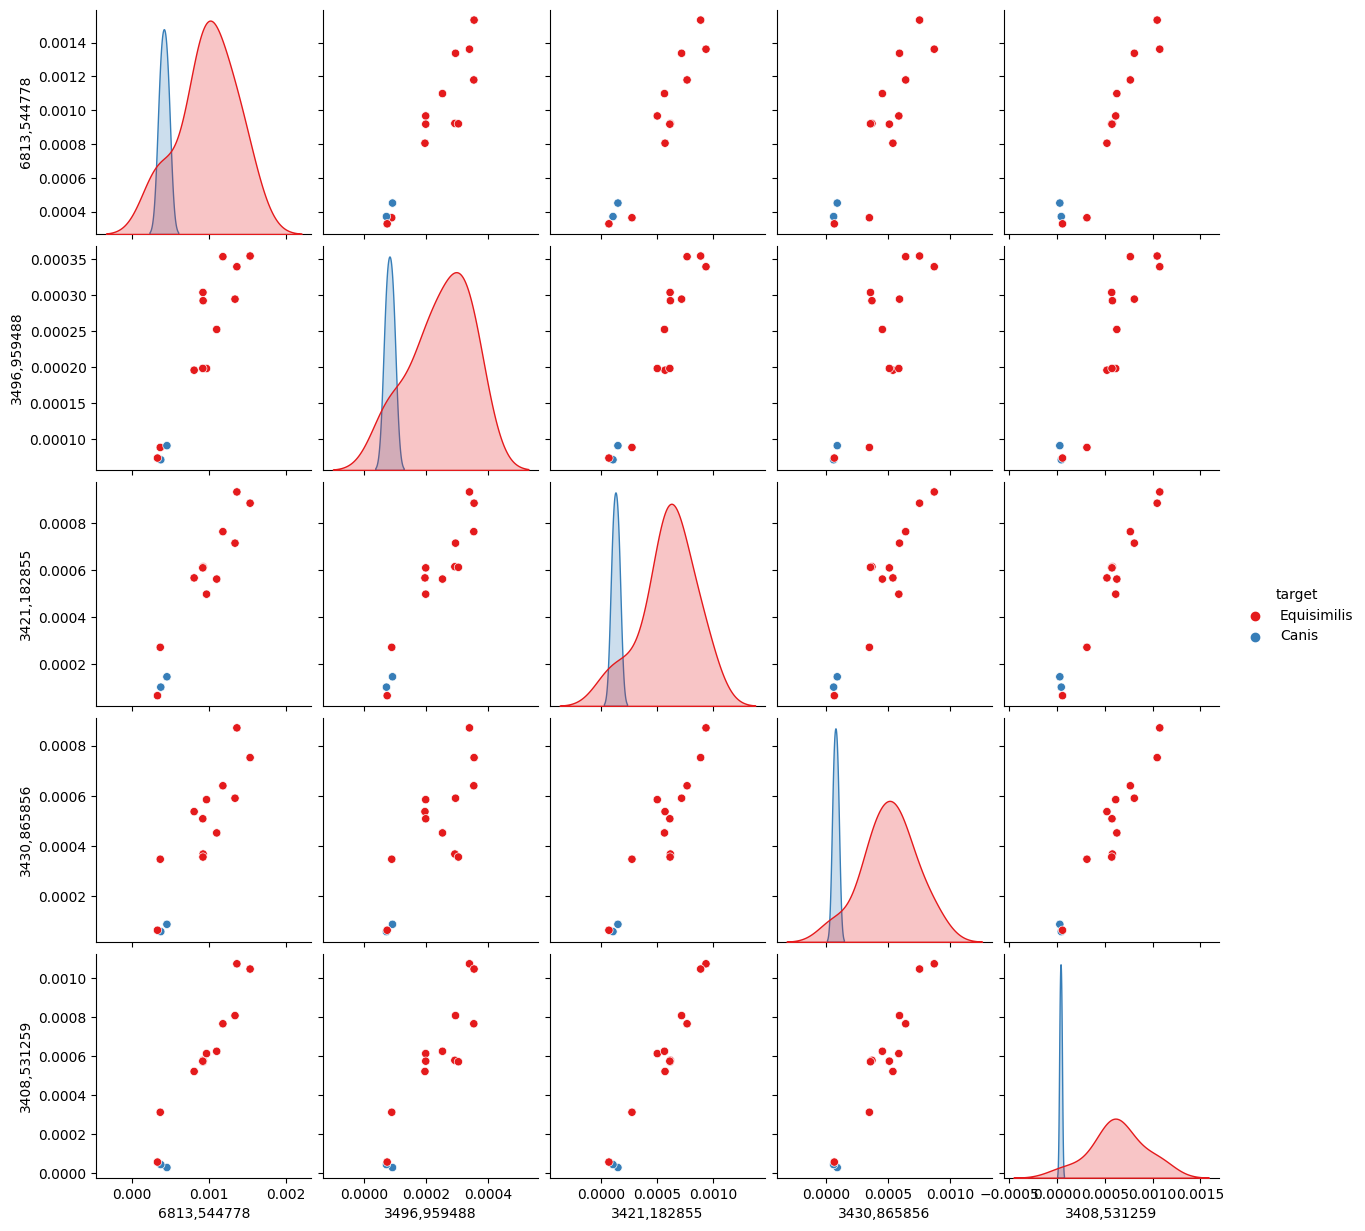

In [139]:
pairplot = maldi[top_corr.index.to_series()]
pairplot['target'] = maldi['target'].map(target_to_name)

sns.pairplot(data=pairplot, hue="target", palette=sns.color_palette('Set1'))
plt.show()

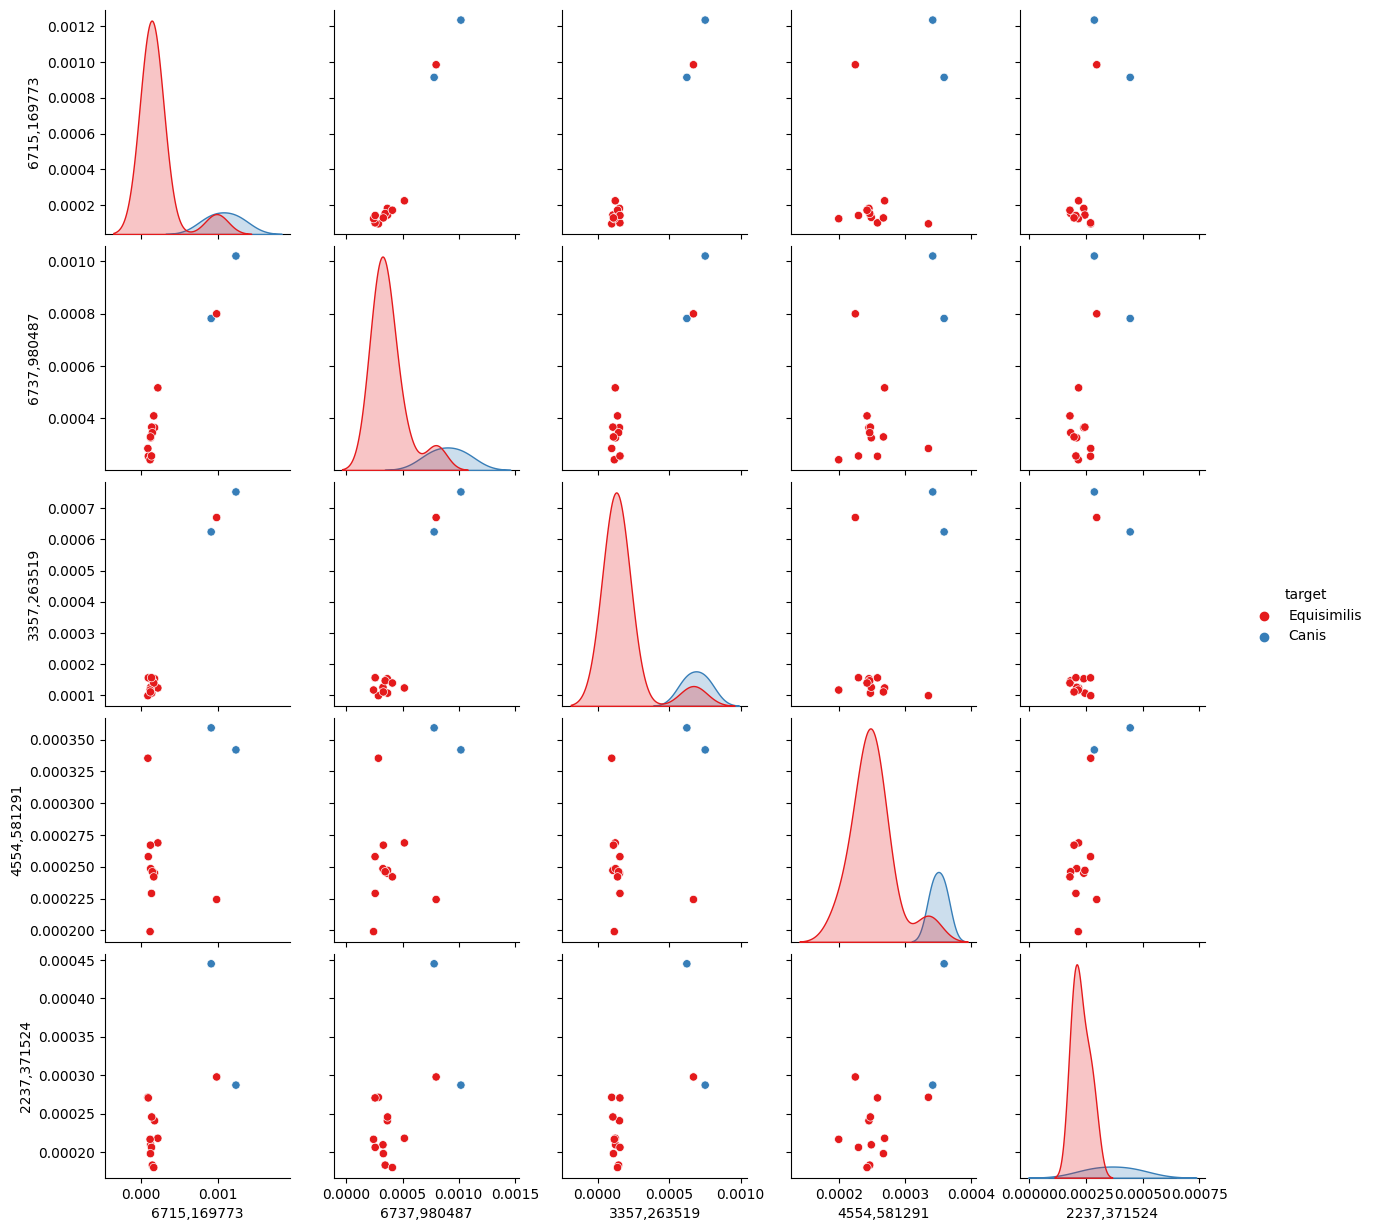

In [140]:
pairplot = maldi[top_corr_inv.index.to_series()]
pairplot['target'] = maldi['target'].map(target_to_name)
sns.pairplot(data=pairplot, hue="target", palette=sns.color_palette('Set1'))
plt.show()

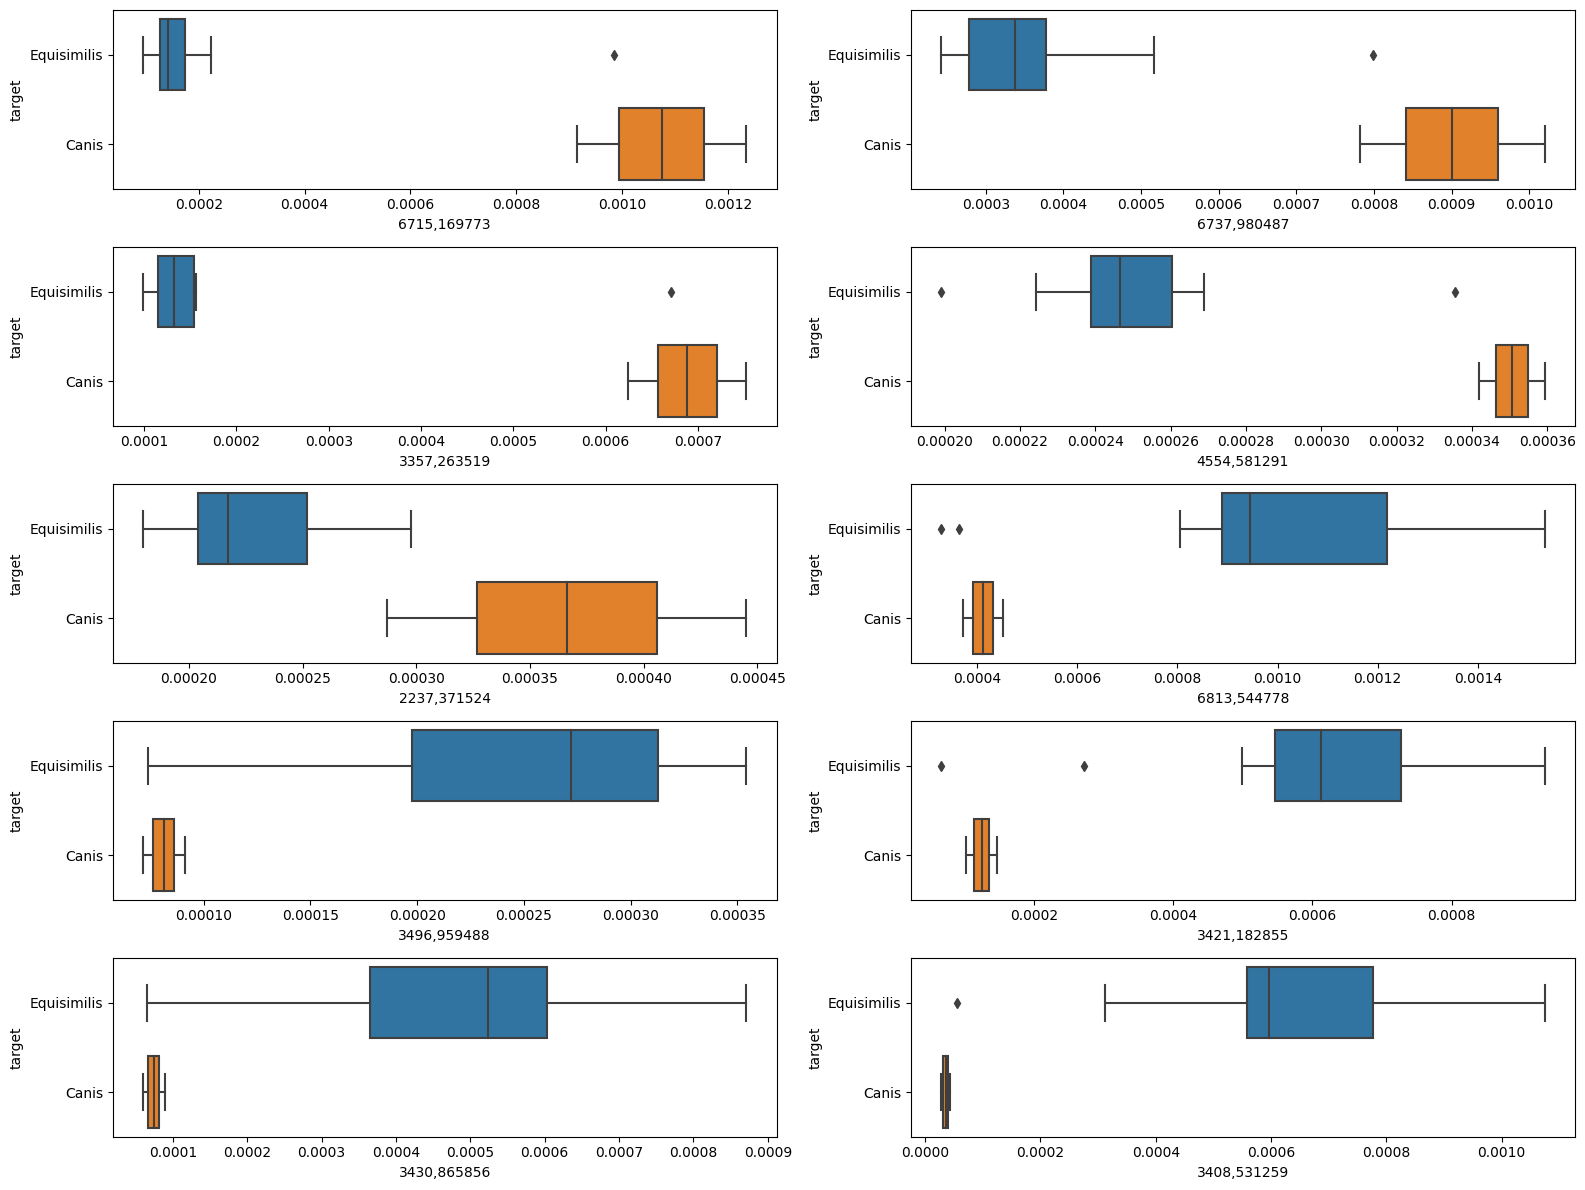

In [141]:
s1 = top_corr_inv.index
s2 = top_corr.index
boxplot_col = np.concatenate([s1, s2])
boxplot = maldi[boxplot_col]
boxplot['target'] = maldi['target'].map(target_to_name)
fig = plt.figure(figsize=(16, 12))
axes = fig.subplots(nrows=5, ncols=2)
for ax, column in zip(axes.flat, boxplot):
    sns.boxplot(y="target", x=column, data=boxplot, ax=ax)
plt.tight_layout()
plt.show()

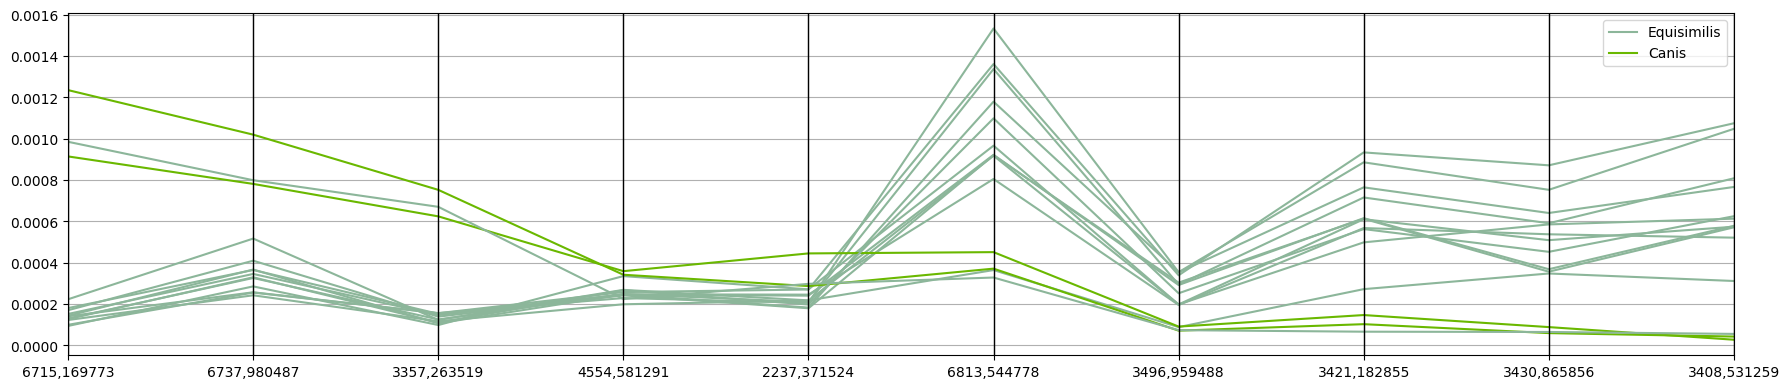

In [142]:
fig = plt.figure(figsize=(18, 4))
ax = fig.subplots()
parallel_coordinates(boxplot, class_column="target", ax=ax)
plt.tight_layout()
fig.show()

## Antibiotici

In [143]:
boxplot = antibiotici
boxplot

,"7263,911218","7387,713575","7409,087763","7910,100883","7932,755395","8187,083885","8210,870156","9491,927409","9516,723663"
ID Strain,,,,,,,,,
V1046,0.000344,0.000409,0.000312,0.000368,0.000264,0.000283,0.000209,0.000308,0.000225
V1203,0.000321,0.000359,0.000271,0.000406,0.000299,0.000343,0.000262,0.000341,0.000257
V1226,0.000292,0.000292,0.000206,0.000326,0.000230,0.000317,0.000233,0.000239,0.000168
V1285,0.000162,0.000420,0.000310,0.000309,0.000224,0.000281,0.000204,0.000225,0.000161
V1398,0.000261,0.000365,0.000262,0.000298,0.000216,0.000307,0.000230,0.000258,0.000190
V1450,0.000263,0.000228,0.000159,0.000345,0.000247,0.000288,0.000213,0.000252,0.000184
V1451,0.000215,0.000401,0.000297,0.000332,0.000242,0.000329,0.000244,0.000316,0.000227
V1524,0.000167,0.000150,0.000096,0.000325,0.000238,0.000221,0.000162,0.000176,0.000127
V234,0.000340,0.000346,0.000260,0.000393,0.000280,0.000241,0.000173,0.000410,0.000303


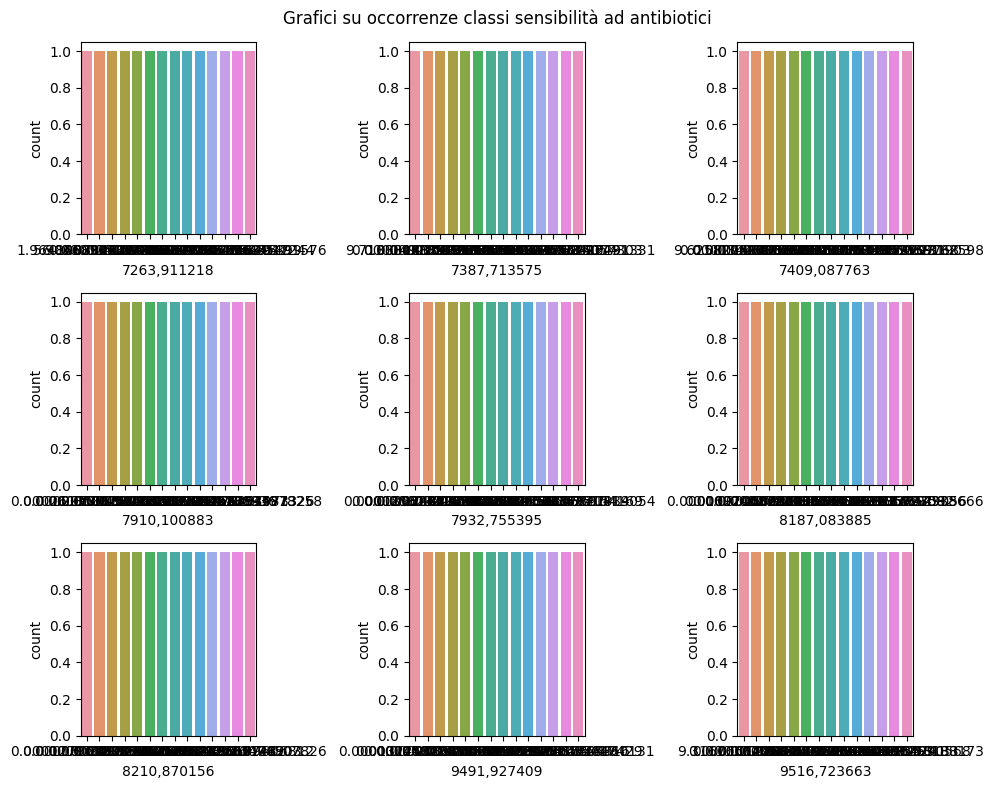

In [144]:
fig = plt.figure(figsize=(10, 8))
axes = fig.subplots(nrows=3, ncols=3)

for ax, column in zip(axes.flat, boxplot):
    sns.countplot(x=column, data=antibiotici, ax=ax)
plt.suptitle("Grafici su occorrenze classi sensibilità ad antibiotici")
plt.tight_layout()
plt.show()

In [145]:
boxplot = virulenza
boxplot

,optrA,poxtA,SAT-4,tet(40),tet(L),tetM,tetO,tetS,tetT,vatE,fbp54,gbs0630,gbs0631,gbs0632,hasC,lmb,mf2,mf3
ID Strain,,,,,,,,,,,,,,,,,,
V1046,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
V1203,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
V1226,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
V1285,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
V1398,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
V1450,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
V1451,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
V1524,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
V234,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0


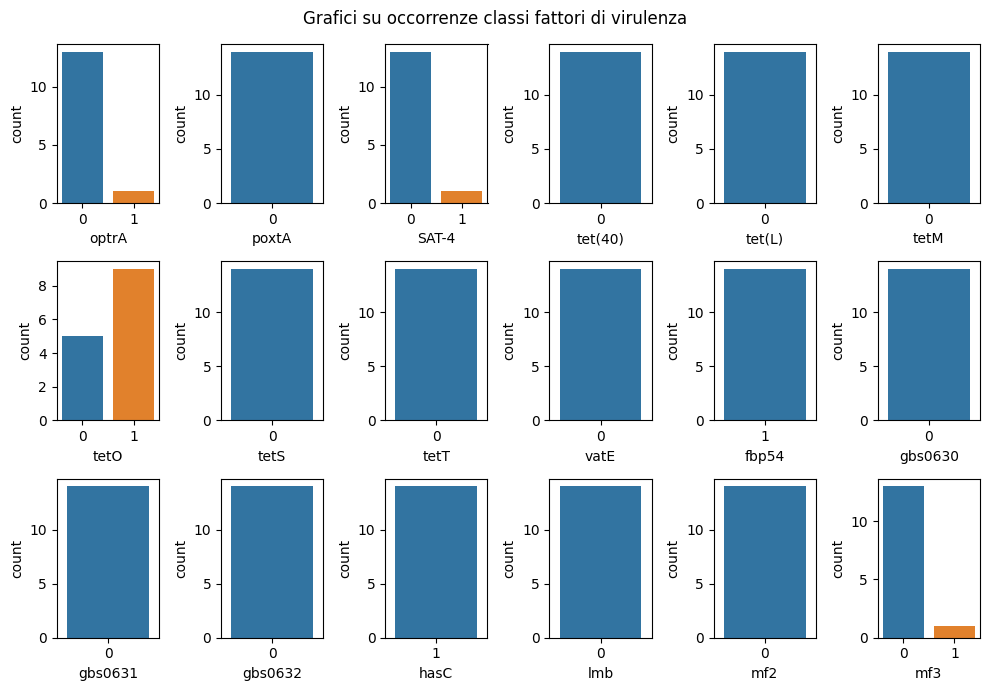

In [146]:
fig = plt.figure(figsize=(10, 7))
axes = fig.subplots(nrows=3, ncols=6)

for ax, column in zip(axes.flat, boxplot):
    sns.countplot(x=column, data=virulenza, ax=ax)
plt.suptitle("Grafici su occorrenze classi fattori di virulenza")
plt.tight_layout()
plt.show()

In [147]:
boxplot = geni_antibiotici
boxplot

,"10935,95302",Eritromicina,Ceftiofur,Tetraciclina,Gentamicina,Penicillina,Ampicillina,Sulfametossazolo_trimethoprim,Clindamicina,Enrofloxacin,...,Erm(47),ErmB,fexA,L._reuteri cat-TC,lmrP,lnuC,lnuD,lsaC,lsaE,mefE
ID Strain,,,,,,,,,,,,,,,,,,,,,
V1046,0.000087,NS,NS,NS,NS,NS,S,NS,NS,NS,...,0,1,0,0,1,0,0,0,0,0
V1203,0.000119,S,S,NS,NS,S,S,NS,NS,NS,...,0,0,0,0,1,0,0,0,1,0
V1226,0.000086,NS,NS,NS,S,NS,NS,NS,NS,S,...,0,0,0,0,1,0,0,0,0,0
V1285,0.000069,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,1,0
V1398,0.000099,NS,S,NS,NS,S,S,NS,NS,NS,...,0,1,0,1,1,0,0,0,0,0
V1450,0.000077,NS,S,NS,NS,S,S,NS,NS,S,...,0,1,0,0,1,0,0,0,1,0
V1451,0.000110,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
V1524,0.000064,S,S,NS,S,S,S,NS,NS,NS,...,0,1,1,0,1,0,0,0,1,1
V234,0.000073,S,S,NS,NS,S,S,S,NS,NS,...,0,0,0,0,1,0,1,0,1,0


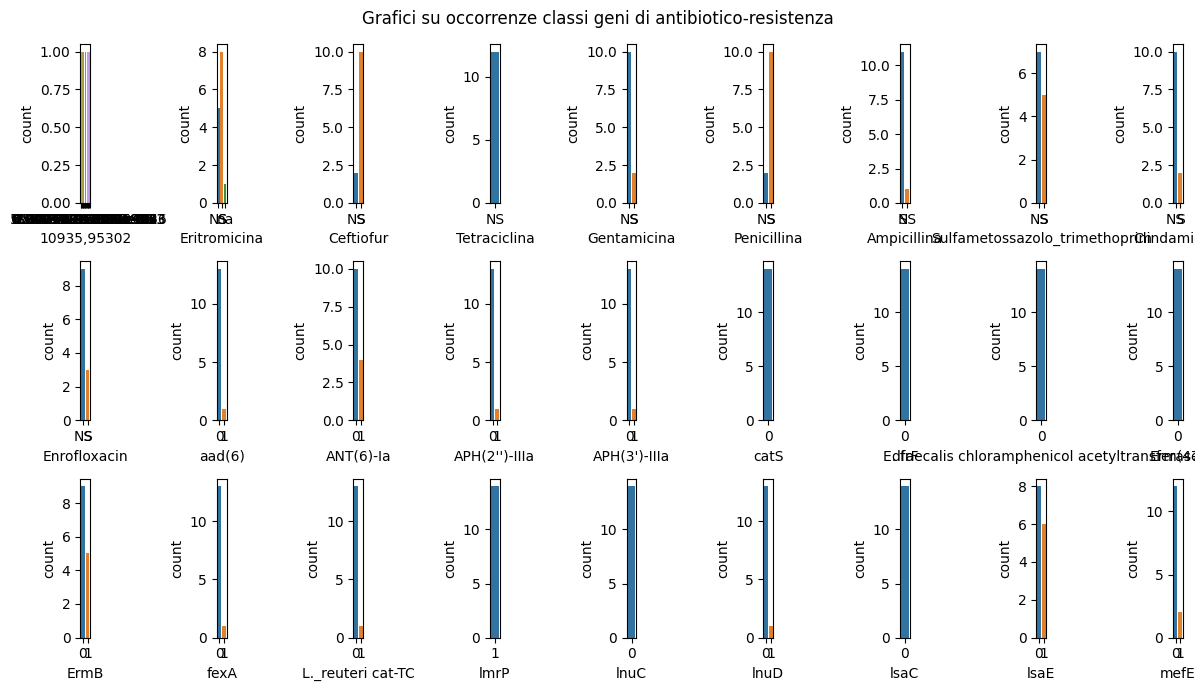

In [148]:
fig = plt.figure(figsize=(12, 7))
axes = fig.subplots(nrows=3, ncols=9)

for ax, column in zip(axes.flat, boxplot):
    sns.countplot(x=column, data=geni_antibiotici, ax=ax)
plt.suptitle("Grafici su occorrenze classi geni di antibiotico-resistenza")
plt.tight_layout()
plt.show()

Da questo grafico possiamo notare come per gli antibiotici:
- Ceftiofur
- Penicillina
- Ampicillina
- Quasi totalmente anche Sulfametossazolo_trimethoprim

Si ha il 100% delle volte o quasi, sensibilità all'antibiotico, è inutile quindi cercare di creare un modello di previsione su di loro, il dataset è troppo sbilanciato per poter dar risultati veritieri